## Import Libraries: 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statistics as stat

## load data:

In [5]:
data = pd.read_csv("C:/Users/chait/Python/Datasets/Titanic-Dataset.csv")

In [6]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Basic understanding of Data:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.shape

(891, 12)

In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [13]:
data.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

## Data Cleaning:

In [136]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [54]:
# Fill missinf values of Age, Cabin and Embarked columns
# Age --> mean
# Embarked ---> Mode

In [57]:
age_mean = np.mean(data['Age'])
age_mean

29.69911764705882

In [72]:
embarked_mode = stat.mode(data['Embarked'])
embarked_mode

'S'

In [84]:
data['Age'] = data['Age'].fillna(age_mean)
data['Embarked'] = data['Embarked'].fillna(embarked_mode)

In [80]:
data['Age'].isnull().sum()

0

In [83]:
data['Embarked'].isnull().sum()

0

## Explore Data:

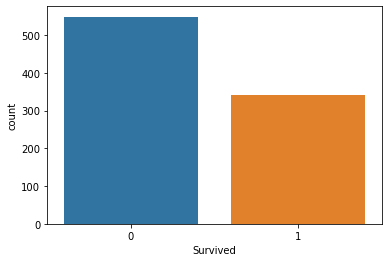

0    549
1    342
Name: Survived, dtype: int64

In [19]:
# Survival Count
sns.countplot(x=data['Survived'])
plt.show()

data['Survived'].value_counts()

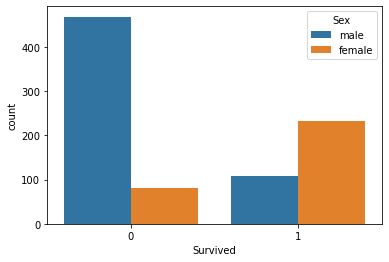

In [22]:
sns.countplot(x=data['Survived'], hue=data['Sex'])
plt.show()

**>>> Females survived more than males**

In [26]:
data.groupby(['Survived', 'Sex'])['Sex'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64

**>>> Out of 577 males 109 are survived and 314 females 233 are survived**

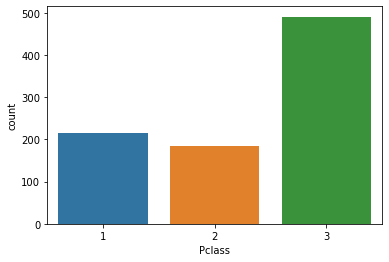

In [27]:
sns.countplot(x=data['Pclass'])
plt.show()

**>>> 3rd Pclass has more Passengers**

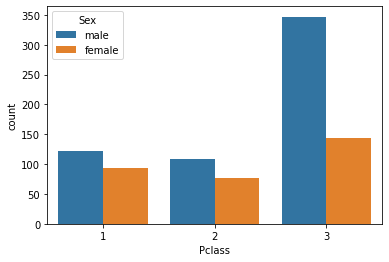

In [28]:
sns.countplot(x=data['Pclass'], hue=data['Sex'])
plt.show()

**>>> 3rd Pclass has more Male passengers** <br>
**>>> In all Pclasses Males passengers are more than Female passengers**

In [35]:
# Survival count of Pclass with Sex 
data.groupby(['Pclass','Sex', 'Survived'])['Survived'].count()

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

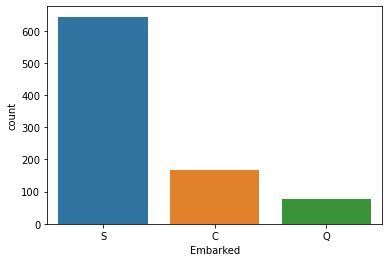

In [43]:
# Embarked ----- Southampton, Cherbourg, and Queenstown
sns.countplot(x=data['Embarked'])
plt.show()

**>>> Most of the passengers are boarded from 'S' Southampton**

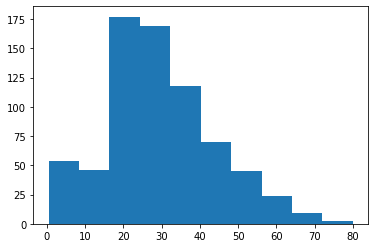

In [44]:
plt.hist(data['Age'])
plt.show()

**>>> Most of the passengers are from 18 to 40 age**

C:\Users\chait\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


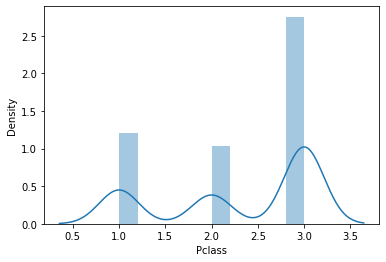

In [129]:
sns.distplot(data['Pclass'])
plt.show()

C:\Users\chait\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


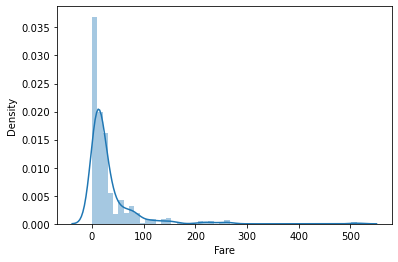

In [134]:
sns.distplot(data['Fare'])
plt.show()

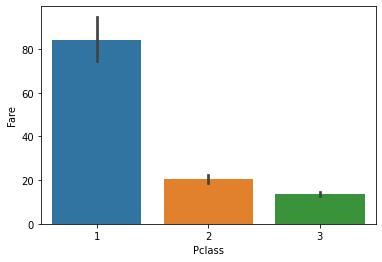

In [104]:
sns.barplot(x=data['Pclass'], y=data['Fare'])
plt.show()

**>>> 1st Pclass has more Fare which is above 80**

In [105]:
data.groupby(['Pclass'])['Fare'].count()

Pclass
1    216
2    184
3    491
Name: Fare, dtype: int64

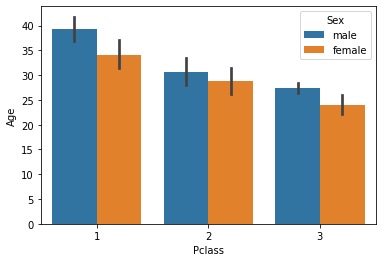

In [94]:
sns.barplot(x=data['Pclass'], y=data['Age'], hue=data['Sex'])
plt.show()

**>>> Age wise male passengers are more in all the Pclasses**

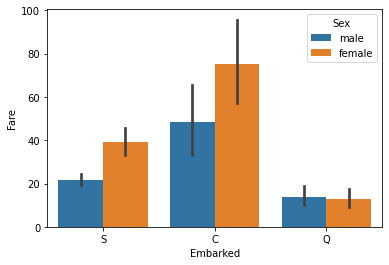

In [102]:
sns.barplot(x=data['Embarked'], y=data['Fare'], hue=data['Sex'])
plt.show()

**>>> 'C' Cherbourg has more Fare** 

In [106]:
data.groupby(['Pclass', 'Embarked'])['Fare'].count()

Pclass  Embarked
1       C            85
        Q             2
        S           129
2       C            17
        Q             3
        S           164
3       C            66
        Q            72
        S           353
Name: Fare, dtype: int64

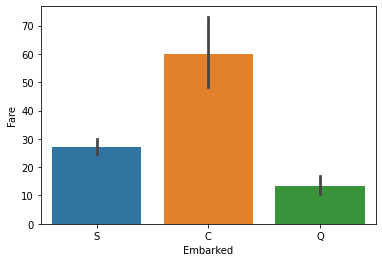

In [107]:
sns.barplot(x=data['Embarked'], y=data['Fare'])
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Age'>

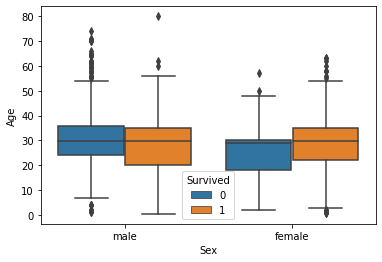

In [127]:
sns.boxplot(x=data['Sex'], y=data['Age'], hue=data['Survived'])

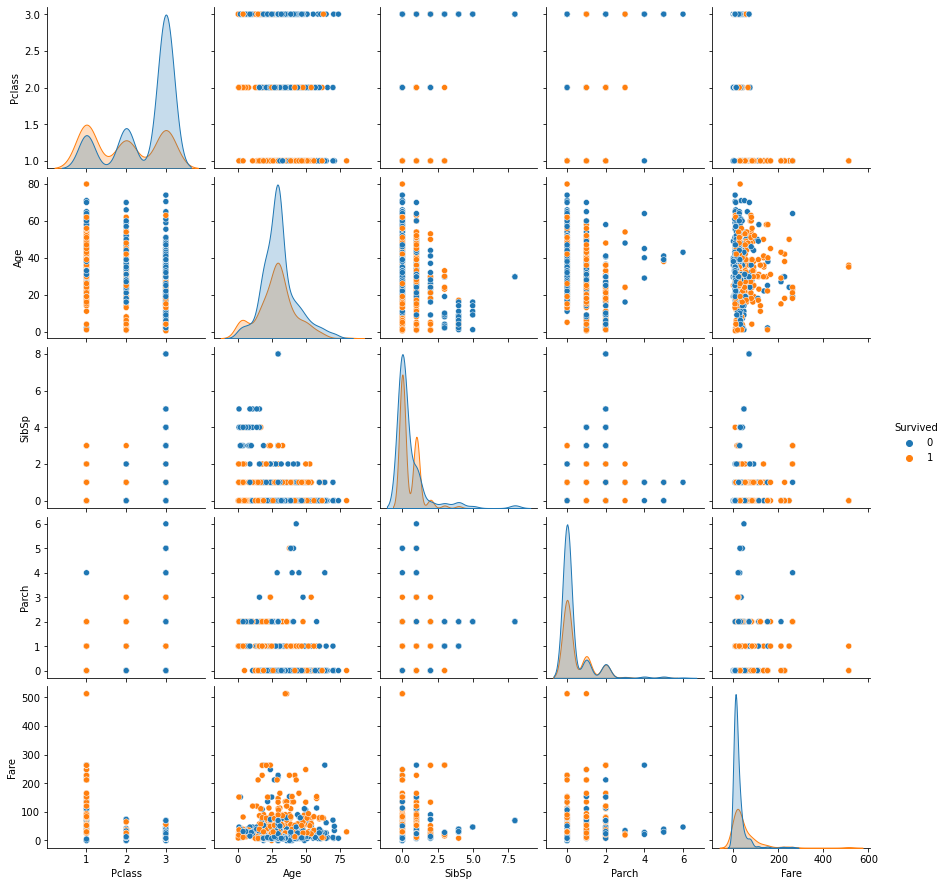

In [120]:
sns.pairplot(data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare','Embarked']] , hue='Survived')
plt.show()

#### Observations:
- Survived: Most of the people died in the shipwreck, only around 300 people survived.
- The female survival rate on the Titanic was significantly higher than the male survival rate
- Pclass: The majority of the people traveling, had tickets to the 3rd class. 
- Sex: There were more males than females aboard the ship.
- Fare: Cherbourg Embarkians has more Fare amount.
- Embarked: Most of the passengers boarded the ship from Southampton.
